In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

In [39]:
data_dir = 'C:/Users/virtanem/OneDrive - Ilmatieteen laitos/gradu/koodit/gradu/data/muu/Alberding_Pasila/*'

data = []
index = 1

for file_path in glob.glob(data_dir):
       pros=(index/len(glob.glob(data_dir))*100)
       index += 1
       print(f'Reading files... {pros:2f}% done', end='\r')
       try:
              df = pd.read_csv(file_path, sep=';')
              df['dn'] = df['dN[cm]']
              df['de'] = df['dE[cm]']
              df['datetime'] = df['Event Time [UTC]']     
              df = df[['datetime', 'dn', 'de']]


              dncount = 0
              decount = 0
              total = 0

              for i in range(len(df) - 9):
                     total += 1
                     if (df.iloc[i]['dn'] > 10 or df.iloc[i]['dn'] < -10) and \
                     (df.iloc[i + 1]['dn'] > 10 or df.iloc[i + 1]['dn'] < -10) and \
                     (df.iloc[i + 1]['dn'] > 10 or df.iloc[i + 2]['dn'] < -10) and \
                     (df.iloc[i + 1]['dn'] > 10 or df.iloc[i + 3]['dn'] < -10) and \
                     (df.iloc[i + 1]['dn'] > 10 or df.iloc[i + 4]['dn'] < -10) and \
                     (df.iloc[i + 1]['dn'] > 10 or df.iloc[i + 5]['dn'] < -10) and \
                     (df.iloc[i + 1]['dn'] > 10 or df.iloc[i + 6]['dn'] < -10) and \
                     (df.iloc[i + 1]['dn'] > 10 or df.iloc[i + 7]['dn'] < -10) and \
                     (df.iloc[i + 1]['dn'] > 10 or df.iloc[i + 8]['dn'] < -10) and \
                     (df.iloc[i + 2]['dn'] > 10 or df.iloc[i + 9]['dn'] < -10):
                            dncount += 1
              
                     if (df.iloc[i]['de'] > 10 or df.iloc[i]['de'] < -10) and \
                     (df.iloc[i + 1]['de'] > 10 or df.iloc[i + 1]['de'] < -10) and \
                     (df.iloc[i + 1]['de'] > 10 or df.iloc[i + 2]['de'] < -10) and \
                     (df.iloc[i + 1]['de'] > 10 or df.iloc[i + 3]['de'] < -10) and \
                     (df.iloc[i + 1]['de'] > 10 or df.iloc[i + 4]['de'] < -10) and \
                     (df.iloc[i + 1]['de'] > 10 or df.iloc[i + 5]['de'] < -10) and \
                     (df.iloc[i + 1]['de'] > 10 or df.iloc[i + 6]['de'] < -10) and \
                     (df.iloc[i + 1]['de'] > 10 or df.iloc[i + 7]['de'] < -10) and \
                     (df.iloc[i + 1]['de'] > 10 or df.iloc[i + 8]['de'] < -10) and \
                     (df.iloc[i + 2]['de'] > 10 or df.iloc[i + 9]['de'] < -10):
                            decount += 1

              # for i in range(len(df)):
              #        total += 1
              #        if (df.iloc[i]['dn'] > 10 or df.iloc[i]['dn'] < -10):
              #               dncount += 1
              
              #        if (df.iloc[i]['de'] > 10 or df.iloc[i]['de'] < -10):
              #               decount += 1


              dt = df['datetime'][0][:-9]
              n = dncount/total
              e = decount/total
       
              data.append({'datetime': dt, 'n': n, 'e': e})
       except:
              print('failed, path:',file_path )
              continue

df = pd.DataFrame(data)  
df['datetime'] = pd.to_datetime(df['datetime'])


failed, path: C:/Users/virtanem/OneDrive - Ilmatieteen laitos/gradu/koodit/gradu/data/muu/Alberding_Pasila\pasivrs01-2059-1-checkInit


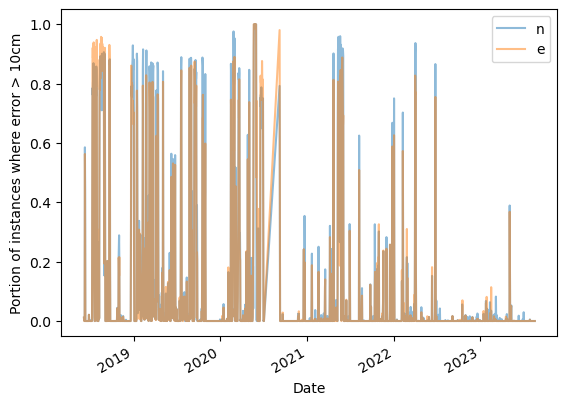

In [40]:
df.plot(kind='line', x='datetime', y=['n', 'e'], alpha = 0.5)

plt.xlabel('Date')
plt.ylabel('Portion of instances where error > 10cm')
plt.legend(['n', 'e'])

In [41]:
path = 'C:/Users/virtanem/OneDrive - Ilmatieteen laitos/gradu/koodit/gradu/data/muu/Alberding_Pasila/pasivrs01-2275-5-checkInit'

df31 = pd.read_csv(path, sep=';')
df31 = df31[['Event Time [UTC]', 'dN[cm]', 'dE[cm]', 'dH[cm]',
       'dNE[cm]', '# of Sat.',
       'Sigma N', 'Sigma E', 'Sigma H',
       'Sigma Sat.', 'Sigma NE']]
df31

,Event Time [UTC],dN[cm],dE[cm],dH[cm],dNE[cm],# of Sat.,Sigma N,Sigma E,Sigma H,Sigma Sat.,Sigma NE
0,2023-08-18T00:00:05,0.7,-0.3,-0.3,0.7,30,0.16,0.10,0.43,0.00,0.19
1,2023-08-18T00:01:35,0.7,-0.1,0.1,0.7,29,0.17,0.17,0.27,3.87,0.24
2,2023-08-18T00:03:05,1.3,-0.0,-0.1,1.3,28,0.20,0.13,0.42,2.10,0.23
3,2023-08-18T00:04:35,0.7,0.1,0.8,0.7,30,0.15,0.17,0.26,0.94,0.23
4,2023-08-18T00:06:05,0.2,0.0,0.3,0.2,31,0.18,0.15,0.26,0.58,0.23
...,...,...,...,...,...,...,...,...,...,...,...
269,2023-08-18T06:45:37,1.0,-0.2,-0.9,1.0,28,0.21,0.13,0.23,0.48,0.25
270,2023-08-18T06:47:07,1.3,-0.4,-1.0,1.3,30,0.21,0.11,0.25,0.33,0.24
271,2023-08-18T06:48:38,0.9,-0.3,-1.1,1.0,30,0.18,0.11,0.29,0.00,0.22
272,2023-08-18T06:50:08,0.1,-0.2,-1.9,0.3,30,0.24,0.13,0.28,0.00,0.27


(0.0, 10.0)

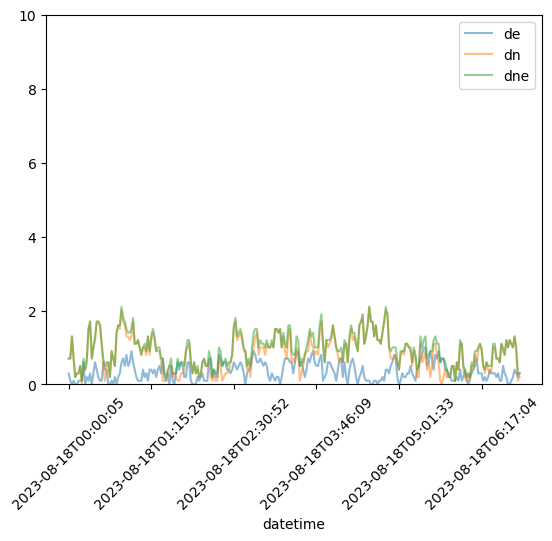

In [42]:
df3 = df31.copy()
df3['dn'] = np.abs(df3['dN[cm]'])
df3['de'] = np.abs(df3['dE[cm]'])
df3['dh'] = np.abs(df3['dH[cm]'])
df3['dne'] = np.abs(df3['dNE[cm]'])
df3['sqrt'] = df3['de']**2 + df3['dn']**2
df3['sqrt'] = np.sqrt(df3['sqrt'])
df3['datetime'] = df3['Event Time [UTC]']     
df3 = df3[['datetime', 'dn', 'de', 'dh', 'sqrt', 'dne']]

df3.plot(kind='line', x='datetime', y=['de', 'dn', 'dne'], alpha=0.5)
plt.xticks(rotation=45)
plt.ylim(0,10)

In [43]:
df.columns

Index(['datetime', 'n', 'e'], dtype='object')

In [44]:
df.plot(kind='line', x='datetime', y=['de', 'dn', 'dne'], alpha=0.5)

KeyError: "None of [Index(['de', 'dn', 'dne'], dtype='object')] are in the [columns]"